In [10]:
import numpy as np
import random
from itertools import product

def Kpath(G, k):
    delta = np.zeros(G.number_of_nodes())
    id = 0
    for node in list(G.nodes):
        delta[id] = G.degree[node]/(2*G.number_of_edges())
        id = id + 1
    for edge in G.edges:
        source, target = edge
        G[source][target]['weight'] = 1/G.number_of_edges()
    
    list_nodes = []
    for node in G.nodes :
        list_nodes.append(node)
    p = G.number_of_edges() - 1
    for i in range(p):
        N = 0
        node = random.choices(list_nodes, weights = delta, k = 1)[0]
        
        T=np.zeros(G.number_of_edges())
        MessagePropagation(G,T,node,N,k)
        
def MessagePropagation(G, T,node, N, k):
    while (N<k) and (len(list(G.edges(node))))!=sommeT(G, T,node):
        edges_weight = []
        cpt = 0
        for edge in G[node].values():
            edges_weight.append(edge["weight"])
            cpt = cpt + 1
        
        edge = random.choices(list(G.edges(node)), weights = edges_weight, k = 1)[0]
        node1, node2 = edge
        G[node1][node2]['weight'] += 1/G.number_of_edges()
        try:
            T[list(G.edges).index((node1, node2))]=1
        except :
            T[list(G.edges).index((node2, node1))]=1
        node = node12(node1, node2, node)
        N = N+1
        
        
def sommeT(G, T, node):
    somme=0
    listEdges=list(G.edges(node))
    for e in listEdges:
        source, target =e
        e2=(target, source)
        try: 
            somme+=T[list(G.edges).index(e)]
        except:
            somme+=T[list(G.edges).index(e2)] 
            
    return somme

def node12(node1, node2, node):
    if node==node1:
        return node2
    else:
        return node1

    
def distance(G, node1, node2) :
    distance = 0
    if(G.has_edge(node1, node2)):
        for node in list(G.nodes()) :
            l1 = 0
            l2 = 0
            
            if G.has_edge(node1, node) :
                l1 = G[node1][node]['weight']
            if G.has_edge(node, node2) :
                l2 = G[node][node2]['weight']

            distance += ((l1 - l2)**2) / G.degree(node, weight="weight")

    return np.sqrt(distance)   


def generate_weighted_graph(G) :
    for u, v in product(G.nodes(), repeat=2): 
        if(G.has_edge(u, v)) : 
            G[u][v]["weight"] = distance(G, u, v)   
            
def FKCD(G, k):
    
    Kpath(G, k)
    generate_weighted_graph(G)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import networkx as nx
from louvain import detect_communities, modularity
import timeit

In [13]:
def draw_communities(G, partition = None , node_size=30, alpha=1, k=None):
    community_map = {}
    for community, nodes in enumerate(partition):
        for node in nodes:
            community_map[node] = community
    
    cmap = plt.get_cmap("jet")
    pos = nx.spring_layout(G, k=k)
    indexed = [community_map.get(node) for node in G]
    plt.axis("off")
   
    nx.draw_networkx_nodes(G, pos=pos, cmap=cmap, node_color=indexed, node_size=node_size, alpha=alpha)
    nx.draw_networkx_edges(G, pos=pos, alpha=0.2)
    
    
    print("\n")
    print("Le nombre de communautés générées: ", len(partition),"\n")
    

football-Louvain


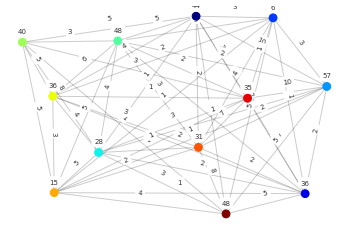

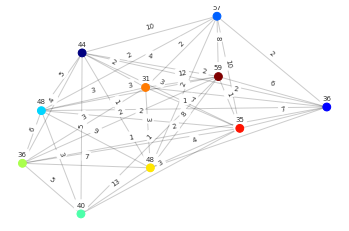

Modularity for best partition: 0.6045695626834515


Le nombre de communautés générées:  10 

Time:  0.5387360999998236


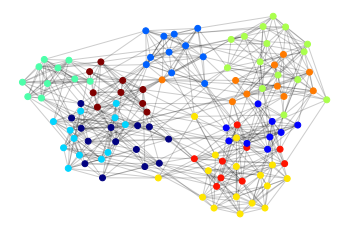

In [14]:
G1 = nx.read_gml('football.gml', label = 'id')

print("football-Louvain")
temps_debut = timeit.default_timer()
partition1 = detect_communities(G1)
temps_fin = timeit.default_timer() - temps_debut
print("Modularity for best partition:", modularity(G1, partition1))
draw_communities(G1, partition1, node_size=35, k=0.3)
print("Time: ", temps_fin)
#list(G1.degree([0, 1, 2,3,4]))
#G.edges.data() 
#G.edges([0, 3])

football-Louvain amélioré


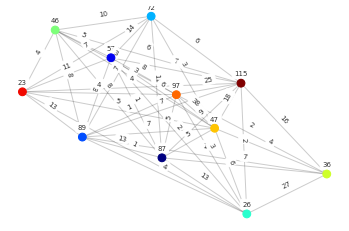

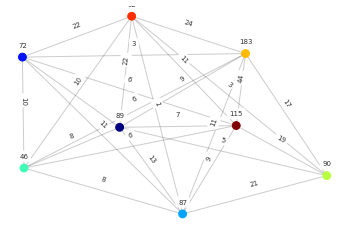

Modularity for best partition: 0.591318070410272


Le nombre de communautés générées:  8 

Time:  0.42151030000013634


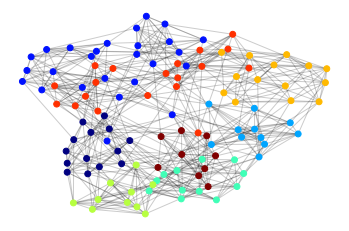

In [15]:
G1_original = nx.read_gml('football.gml', label = 'id')
G1 = nx.read_gml('football.gml', label = 'id')

print("football-Louvain amélioré")
FKCD(G1, 2)
temps_debut = timeit.default_timer()
partition1 = detect_communities(G1)
temps_fin = timeit.default_timer() - temps_debut


print("Modularity for best partition:", modularity(G1_original, partition1))
draw_communities(G1, partition1, node_size=35, k=0.3)
print("Time: ", temps_fin)



Le nombre de communautés générées:  8 



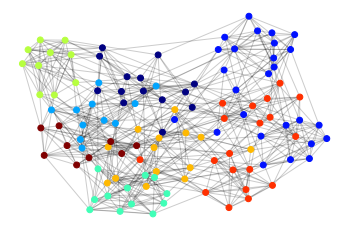

In [16]:
draw_communities(G1_original, partition1, node_size=35, k=0.3)

karate-Louvain


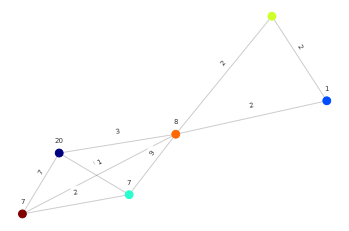

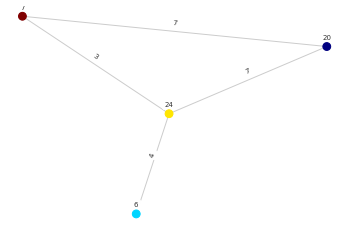

Modularity for best partition: 0.41880341880341804


Le nombre de communautés générées:  4 

Time:  0.26327710000009574


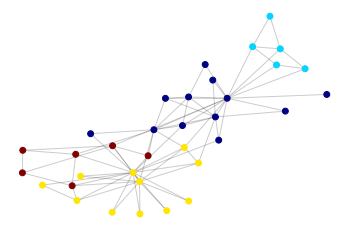

In [17]:
G1 = nx.read_gml('karate.gml', label = 'id')

print("karate-Louvain")
temps_debut = timeit.default_timer()
partition1 = detect_communities(G1)
temps_fin = timeit.default_timer() - temps_debut
print("Modularity for best partition:", modularity(G1, partition1))
draw_communities(G1, partition1, node_size=35, k=0.3)
print("Time: ", temps_fin)
#list(G1.degree([0, 1, 2,3,4]))
#G.edges.data() 
#G.edges([0, 3])

karate-Louvain amélioré


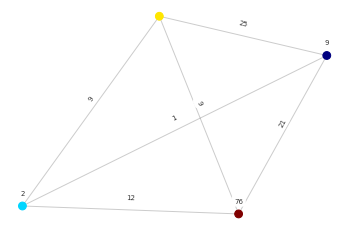

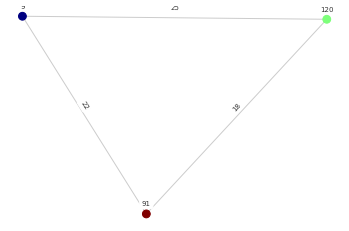

Modularity for best partition: 0.3724523339907941


Le nombre de communautés générées:  3 

Time:  0.1578682999997909


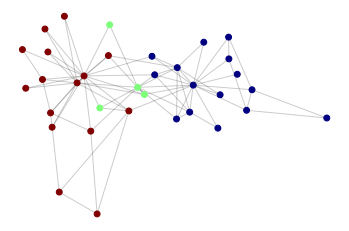

In [18]:
G1_original = nx.read_gml('karate.gml', label = 'id')
G1 = nx.read_gml('karate.gml', label = 'id')

print("karate-Louvain amélioré")
Kpath(G1, 2)
generate_weighted_graph(G1)
temps_debut = timeit.default_timer()
partition1 = detect_communities(G1)
temps_fin = timeit.default_timer() - temps_debut


print("Modularity for best partition:", modularity(G1_original, partition1))
draw_communities(G1, partition1, node_size=35, k=0.3)
print("Time: ", temps_fin)

lopbooks-Louvain


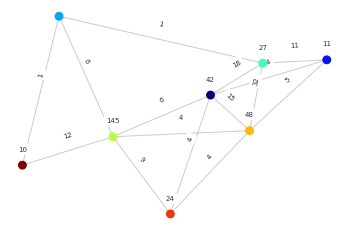

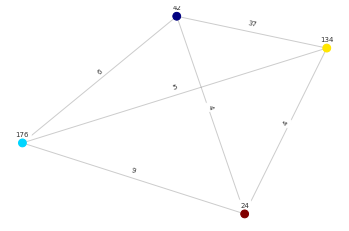

Modularity for best partition: 0.5204852916223351


Le nombre de communautés générées:  4 

Time:  0.18329300000004878


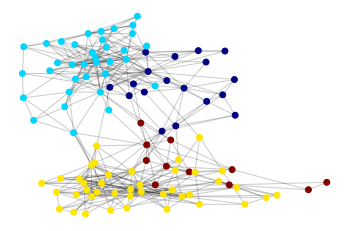

In [26]:
G2 = nx.read_gml('polbooks.gml', label = 'id')

print("lopbooks-Louvain")
temps_debut = timeit.default_timer()
partition2 = detect_communities(G2)
temps_fin = timeit.default_timer() - temps_debut
print("Modularity for best partition:", modularity(G2, partition2))
draw_communities(G2, partition2, node_size=35, k=0.3)
print("Time: ", temps_fin)

lopbooks-Louvain amélioré


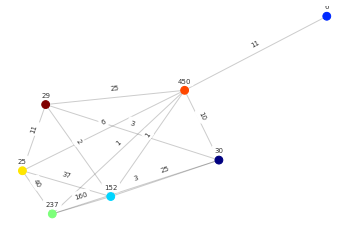

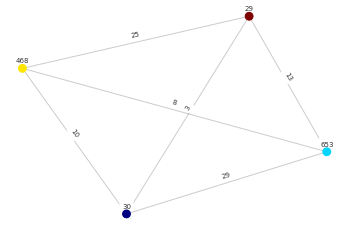

Modularity for best partition: 0.5152302795646054


Le nombre de communautés générées:  4 

Time:  0.22337670000001708


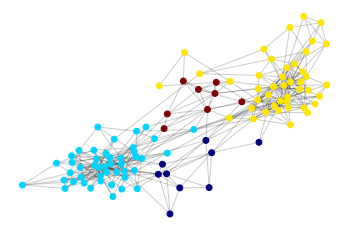

In [19]:
G2_original = nx.read_gml('polbooks.gml', label = 'id')
G2 = nx.read_gml('polbooks.gml', label = 'id')

print("lopbooks-Louvain amélioré")
Kpath(G2, 2)
generate_weighted_graph(G2)
temps_debut = timeit.default_timer()
partition2 = detect_communities(G2)
temps_fin = timeit.default_timer() - temps_debut


print("Modularity for best partition:", modularity(G2_original, partition2))
draw_communities(G2, partition2, node_size=35, k=0.3)
print("Time: ", temps_fin)

dolphins-Louvain


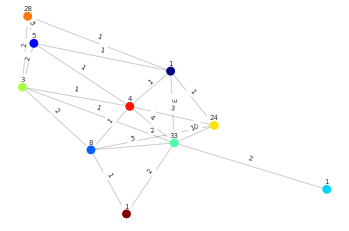

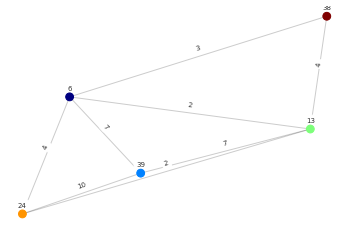

Modularity for best partition: 0.5188283691309657


Le nombre de communautés générées:  5 

Time:  0.2180874999999105


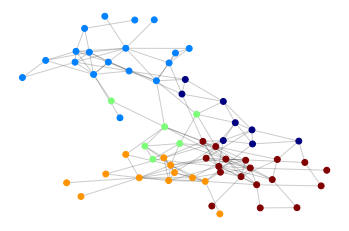

In [28]:
G2 = nx.read_gml('dolphins.gml', label = 'id')

print("dolphins-Louvain")
temps_debut = timeit.default_timer()
partition2 = detect_communities(G2)
temps_fin = timeit.default_timer() - temps_debut
print("Modularity for best partition:", modularity(G2, partition2))
draw_communities(G2, partition2, node_size=35, k=0.3)
print("Time: ", temps_fin)

dolphins-Louvain amélioré


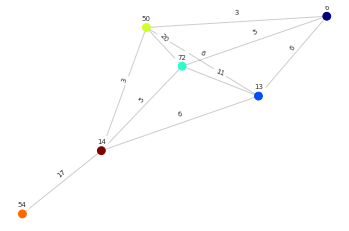

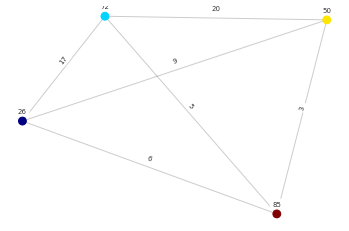

Modularity for best partition: 0.519164590008305


Le nombre de communautés générées:  4 

Time:  0.19699409999998352


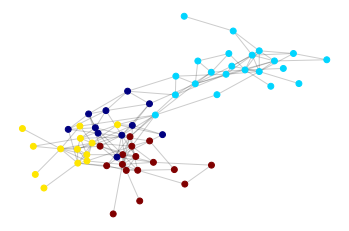

In [20]:
G2_original = nx.read_gml('dolphins.gml', label = 'id')
G2 = nx.read_gml('dolphins.gml', label = 'id')

print("dolphins-Louvain amélioré")
Kpath(G2, 2)
generate_weighted_graph(G2)
temps_debut = timeit.default_timer()
partition2 = detect_communities(G2)
temps_fin = timeit.default_timer() - temps_debut


print("Modularity for best partition:", modularity(G2_original, partition2))
draw_communities(G2, partition2, node_size=35, k=0.3)
print("Time: ", temps_fin)

In [22]:
import collections
from sklearn.metrics import accuracy_score

network2(u=0.2)-Louvain


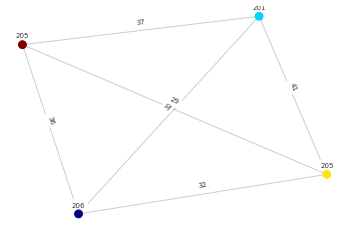

Modularity for best partition: 0.5478515625


Le nombre de communautés générées:  4 

Time:  0.10207379999997102

Community distribution:
original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

Accuracy 1.0


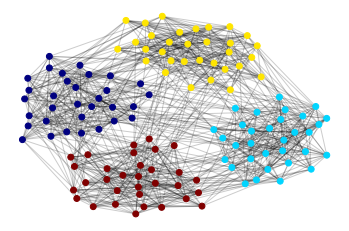

In [24]:
#benchmark u=0.2
network2 = nx.Graph()
nx.read_edgelist('network2.dat', create_using=network2, nodetype=int, data=(('weight', float),))
print("network2(u=0.2)-Louvain")
temps_debut = timeit.default_timer()
partition = detect_communities(network2)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network2, partition))
draw_communities(network2, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
print('\nCommunity distribution:')
original_community = np.loadtxt('community2.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('original',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 3
    if c == 3: node_community[index] = 4
    if c == 4: node_community[index] = 1
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)

network2(u=0.2)-Louvain amélioré


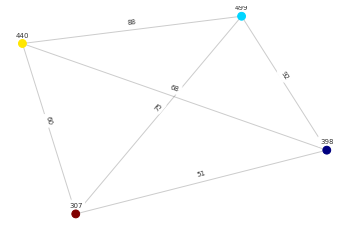

Modularity for best partition: 0.5342012178309622


Le nombre de communautés générées:  4 

Time:  0.11562200000003031

Community distribution:
original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

Accuracy 1.0


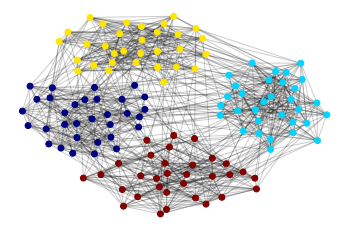

In [25]:
#benchmark u=0.2 (amélioré)
network2 = nx.Graph()
nx.read_edgelist('network2.dat', create_using=network2, nodetype=int, data=(('weight', float),))
print("network2(u=0.2)-Louvain amélioré")
Kpath(network2, 2)
generate_weighted_graph(network2)
temps_debut = timeit.default_timer()
partition = detect_communities(network2)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network2, partition))
draw_communities(network2, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
print('\nCommunity distribution:')
original_community = np.loadtxt('community2.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('original',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 3
    if c == 3: node_community[index] = 4
    if c == 4: node_community[index] = 1
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)

network4(u=0.4)-Louvain


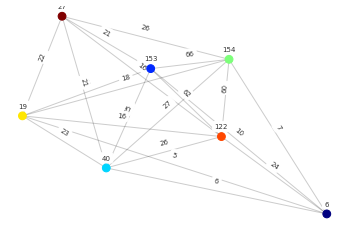

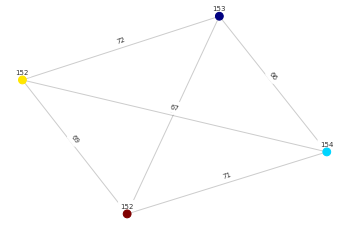

Modularity for best partition: 0.3466796875


Le nombre de communautés générées:  4 

Time:  0.24484320000010484

Community distribution:
original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

Accuracy 1.0


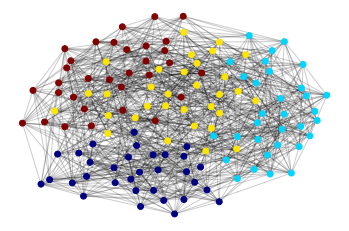

In [26]:
#benchmark u=0.4
network4 = nx.Graph()
nx.read_edgelist('network4.dat', create_using=network4, nodetype=int, data=(('weight', float),))
print("network4(u=0.4)-Louvain")
temps_debut = timeit.default_timer()
partition = detect_communities(network4)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network4, partition))
draw_communities(network4, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
print('\nCommunity distribution:')
original_community = np.loadtxt('community4.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('original',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 4
    if c == 4: node_community[index] = 1
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)

network4(u=0.4)-Louvain amélioré


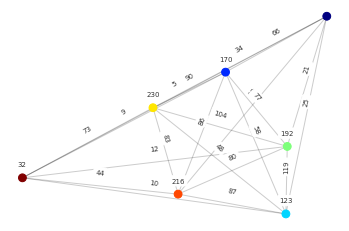

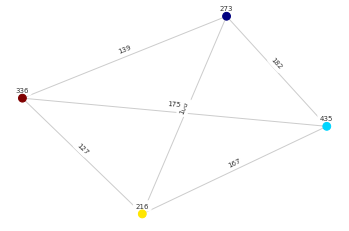

Modularity for best partition: 0.32499333494814436


Le nombre de communautés générées:  4 

Time:  0.21228090000022348

Community distribution:
original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 4, 3, 3, 3, 2, 2, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 2, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 2, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 2, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

Accuracy 0.96875


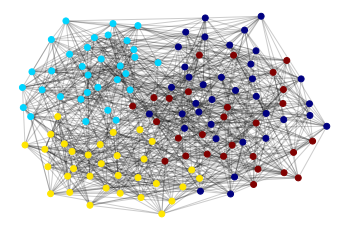

In [34]:
#benchmark u=0.4 (amélioré)
network4 = nx.Graph()
nx.read_edgelist('network4.dat', create_using=network4, nodetype=int, data=(('weight', float),))
print("network4(u=0.4)-Louvain amélioré")
Kpath(network4, 2)
generate_weighted_graph(network4)
temps_debut = timeit.default_timer()
partition = detect_communities(network4)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network4, partition))
draw_communities(network4, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
print('\nCommunity distribution:')
original_community = np.loadtxt('community4.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('original',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 4
    if c == 4: node_community[index] = 1
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)

network6(u=0.6)-Louvain


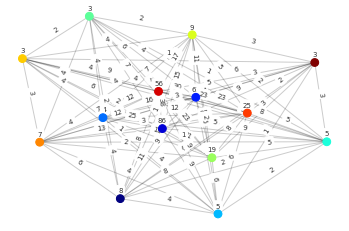

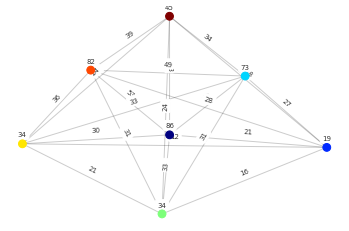

Modularity for best partition: 0.2080078125


Le nombre de communautés générées:  7 

Time:  0.6044031999999788

Community distribution:
original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 7, 5, 5, 1, 6, 4, 1, 5, 6, 1, 5, 2, 4, 2, 3, 3, 7, 5, 7, 1, 3, 3, 2, 5, 6, 2, 1, 4, 5, 6, 1, 5, 5, 1, 2, 2, 5, 3, 2, 4, 1, 4, 1, 1, 4, 2, 3, 5, 6, 3, 2, 5, 5, 4, 3, 2, 1, 2, 6, 6, 1, 5, 3, 1, 5, 6, 6, 4, 4, 4, 4, 2, 7, 2, 2, 1, 2, 7, 7, 1, 1, 4, 6, 1, 3, 5, 5, 6, 1, 5, 2, 3, 6, 1, 7, 5, 3, 2, 1, 2, 2, 6, 7, 1, 2, 3, 4, 4, 7, 5, 2, 1, 2, 7, 1, 5, 4, 4, 6, 2, 3, 5, 5, 2, 4, 1, 1]

Accuracy 0.2109375


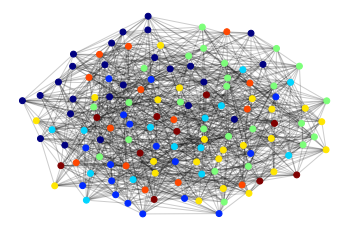

In [27]:
#benchmark u=0.6
network6 = nx.Graph()
nx.read_edgelist('network6.dat', create_using=network6, nodetype=int, data=(('weight', float),))
print("network6(u=0.6)-Louvain")
temps_debut = timeit.default_timer()
partition = detect_communities(network6)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network6, partition))
draw_communities(network6, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
print('\nCommunity distribution:')
original_community = np.loadtxt('community4.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('original',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 4
    if c == 4: node_community[index] = 1
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)

network6(u=0.6)-Louvain amélioré


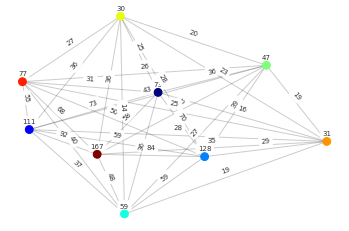

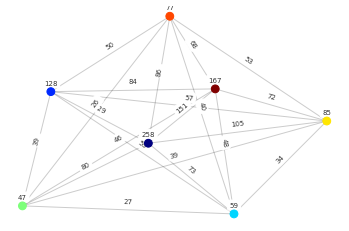

Modularity for best partition: 0.20813803338195214


Le nombre de communautés générées:  7 

Time:  0.34283220000020265

original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 7, 1, 1, 4, 4, 3, 4, 3, 4, 7, 4, 2, 1, 2, 3, 7, 4, 4, 3, 4, 7, 2, 4, 1, 2, 2, 2, 2, 1, 4, 3, 1, 1, 4, 3, 2, 4, 4, 4, 7, 4, 3, 4, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 3, 3, 2, 3, 7, 4, 3, 4, 1, 7, 3, 4, 4, 4, 4, 3, 2, 2, 3, 2, 2, 2, 4, 7, 7, 4, 4, 3, 2, 4, 7, 4, 2, 1, 4, 4, 1, 7, 7, 2, 4, 3, 4, 2, 4, 3, 2, 4, 1, 4, 3, 2, 3, 3, 3, 1, 1, 3, 4, 3, 3, 3, 1, 3, 4, 7, 7, 2, 3, 4, 2, 3, 2, 2]

Accuracy 0.21875


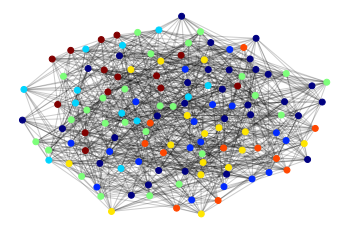

In [28]:
#benchmark u=0.6 (amélioré)
network6 = nx.Graph()
nx.read_edgelist('network6.dat', create_using=network6, nodetype=int, data=(('weight', float),))
print("network6(u=0.6)-Louvain amélioré")
Kpath(network6, 2)
generate_weighted_graph(network6)
temps_debut = timeit.default_timer()
partition = detect_communities(network6)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network6, partition))
draw_communities(network6, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
original_community = np.loadtxt('community6.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('\noriginal',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 1
    if c == 5: node_community[index] = 3
    if c == 6: node_community[index] = 4
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)

network8(u=0.8)-Louvain


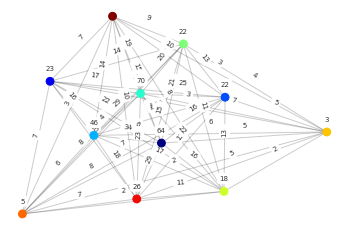

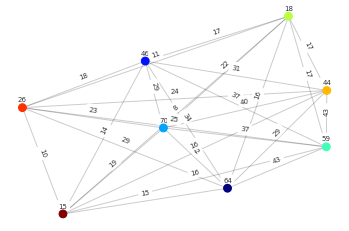

Modularity for best partition: 0.195556640625


Le nombre de communautés générées:  8 

Time:  0.5273855000000367

original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 4, 3, 4, 8, 4, 2, 2, 2, 3, 2, 6, 1, 4, 4, 4, 4, 1, 6, 1, 3, 1, 1, 3, 1, 1, 5, 4, 3, 3, 2, 4, 4, 4, 4, 6, 6, 1, 4, 5, 6, 4, 2, 8, 5, 4, 4, 5, 1, 3, 4, 5, 2, 4, 1, 8, 3, 1, 3, 2, 4, 2, 3, 6, 2, 4, 2, 5, 6, 8, 6, 2, 2, 2, 1, 2, 5, 2, 5, 3, 6, 4, 6, 8, 4, 4, 6, 3, 3, 4, 8, 2, 8, 1, 8, 8, 3, 3, 1, 6, 3, 6, 3, 3, 3, 3, 1, 2, 6, 3, 6, 8, 4, 4, 4, 2, 8, 2, 1, 4, 4, 6, 6, 6, 4, 8, 1, 4]

Accuracy 0.203125


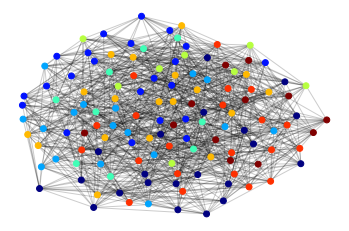

In [29]:
#benchmark u=0.8
network8 = nx.Graph()
nx.read_edgelist('network8.dat', create_using=network8, nodetype=int, data=(('weight', float),))
print("network8(u=0.8)-Louvain")
temps_debut = timeit.default_timer()
partition = detect_communities(network8)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network8, partition))
draw_communities(network8, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
original_community = np.loadtxt('community8.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('\noriginal',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 4
    if c == 7: node_community[index] = 3
    if c == 3: node_community[index] = 1
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)

network8(u=0.8)-Louvain amélioré


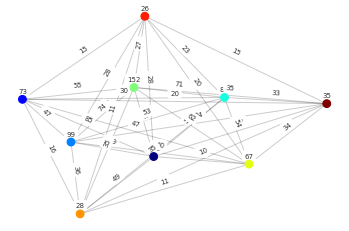

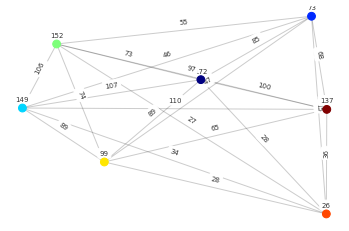

Modularity for best partition: 0.2101474264828885


Le nombre de communautés générées:  7 

Time:  0.3659142999999858

original [2, 4, 3, 3, 3, 2, 1, 4, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 4, 4, 3, 4, 3, 2, 1, 2, 3, 4, 4, 2, 2, 3, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 1, 2, 1, 2, 4, 3, 2, 2, 3, 4, 1, 1, 4, 3, 3, 2, 3, 3, 3, 4, 2, 3, 2, 2, 4, 4, 1, 2, 1, 2, 1, 4, 2, 1, 2, 1, 4, 4, 2, 4, 3, 3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 2, 1, 2, 3, 4, 4, 3, 3, 1, 4, 3, 1, 1, 3, 3, 1, 3, 3, 3, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 4, 4]

new      [2, 3, 4, 3, 1, 3, 2, 4, 4, 1, 5, 1, 6, 3, 4, 3, 3, 6, 6, 1, 1, 6, 5, 4, 6, 3, 4, 3, 1, 4, 2, 3, 4, 4, 2, 1, 6, 1, 6, 4, 6, 4, 2, 6, 4, 6, 3, 4, 6, 1, 4, 4, 2, 1, 4, 4, 4, 1, 6, 2, 6, 2, 4, 4, 2, 3, 2, 1, 6, 3, 6, 2, 2, 1, 1, 2, 3, 4, 1, 5, 1, 1, 6, 3, 3, 3, 6, 4, 5, 3, 1, 5, 1, 1, 3, 1, 2, 4, 6, 6, 1, 6, 5, 4, 6, 4, 6, 2, 6, 4, 6, 5, 4, 4, 3, 2, 4, 6, 1, 3, 3, 4, 1, 6, 2, 1, 2, 3]

Accuracy 0.1875


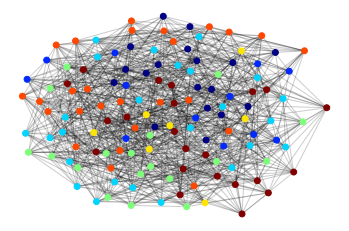

In [30]:
#benchmark u=0.8 (amélioré)
network8 = nx.Graph()
nx.read_edgelist('network8.dat', create_using=network8, nodetype=int, data=(('weight', float),))
print("network8(u=0.8)-Louvain amélioré")
Kpath(network8, 2)
generate_weighted_graph(network8)
temps_debut = timeit.default_timer()
partition = detect_communities(network8)
temps_fin = timeit.default_timer() - temps_debut

print("Modularity for best partition:", modularity(network8, partition))
draw_communities(network8, partition, node_size=35, k=0.3)
print("Time: ", temps_fin)

#Accuracy
original_community = np.loadtxt('community8.dat', unpack = True)
original_node_community = original_community[1, :]
original_node_community = [int(x) for x in original_node_community]
print('\noriginal',original_node_community)

community_map = {}
for community, nodes in enumerate(partition):
    for node in nodes:
        community_map[node] = community+1
ord_community_map = collections.OrderedDict(sorted(community_map.items()))
node_community = list(ord_community_map.values())
for index, c in enumerate(node_community):
    if c == 1: node_community[index] = 2
    if c == 2: node_community[index] = 4
    if c == 7: node_community[index] = 3
    if c == 3: node_community[index] = 1
print('\nnew     ', node_community)

accuracy = accuracy_score(node_community,original_node_community)
print('\nAccuracy', accuracy)